## Summer School on Deep Learning-2019 Surathkal, Karnataka

#### Mounting

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/SSDL/Day1/Image')
print(os.getcwd())

/content/drive/My Drive/SSDL/Day1/Image


#### Importing libraries

In [1]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


#### Weight Initialization Module

In [0]:
class WeightCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%1 == 0:
            fig, axs = plt.subplots(1,10, figsize=(10*1.5,1.5), facecolor='w', edgecolor='k')
            for i in range(10):
                axs[i].set_title("Fashion : " + str(i))
                digit = model.layers[0].get_weights()[0][:,i]
                #digit = ((digit - digit.min())*(1/(digit.max() - digit.min()))*255).astype("uint8")
                axs[i].imshow(digit.reshape(28,28),cmap="viridis")

In [0]:
weight = WeightCallback()

#### Downloading Fashion_MNIST dataset
* Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. ... Fashion-MNIST is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.

In [4]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


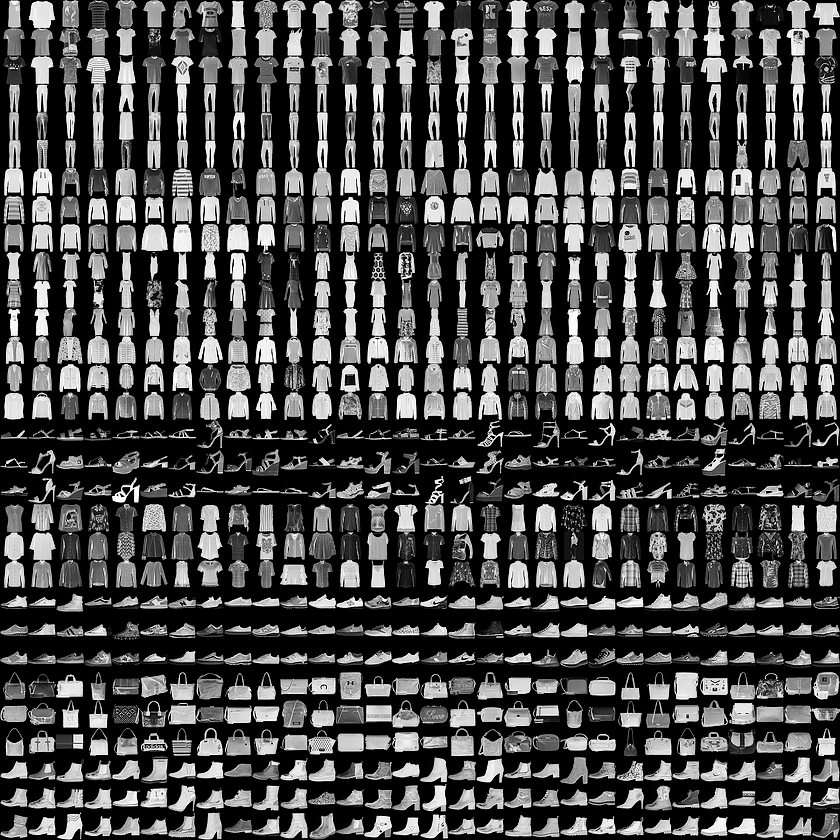

In [0]:
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/SSDL/Day1/Image/fashion-mnist-sprite.png', embed=True))

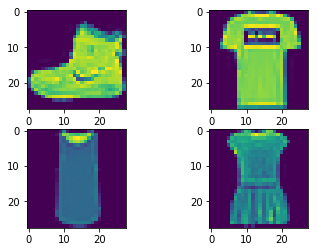

In [5]:
plt.subplot(221).imshow(xtrain[0])
plt.subplot(222).imshow(xtrain[1])
plt.subplot(223).imshow(xtrain[2])
plt.subplot(224).imshow(xtrain[3])

#### Reshape the data

In [6]:
xtrain = xtrain.reshape(xtrain.shape[0],784).astype('float32')/255
xtest  = xtest.reshape(xtest.shape[0],784).astype('float32')/255
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


####  Converting the labels to categorical

In [7]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


#### Building the Model

In [0]:
import keras
from keras import models
from keras import layers

In [9]:
model = models.Sequential()
model.add(layers.Dense(10,input_shape = (784,), activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

#### Fit the Model

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 76us/step - loss: 0.8689 - acc: 0.7153 - val_loss: 0.6141 - val_acc: 0.7971
Epoch 2/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.5701 - acc: 0.8117 - val_loss: 0.5335 - val_acc: 0.8209
Epoch 3/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.5132 - acc: 0.8290 - val_loss: 0.4982 - val_acc: 0.8299
Epoch 4/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.4844 - acc: 0.8383 - val_loss: 0.4806 - val_acc: 0.8373
Epoch 5/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.4657 - acc: 0.8439 - val_loss: 0.4648 - val_acc: 0.8416
Epoch 6/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.4525 - acc: 0.8478 - val_loss: 0.4630 - val_acc: 0.8420
Epoch 7/20
48000/48000 [==============================] - 1s 18us/step - loss: 0

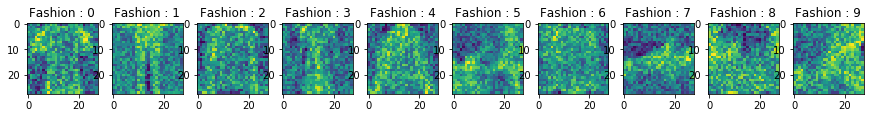

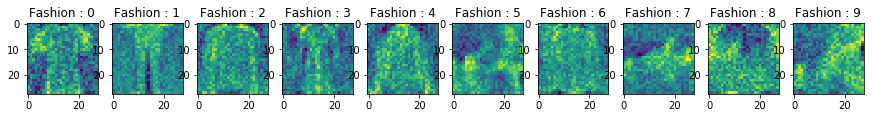

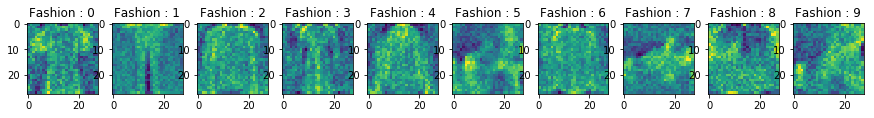

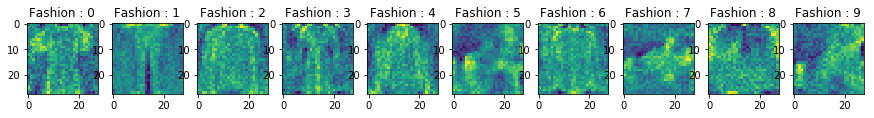

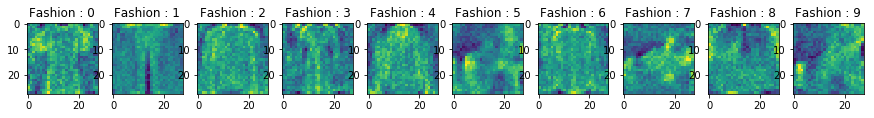

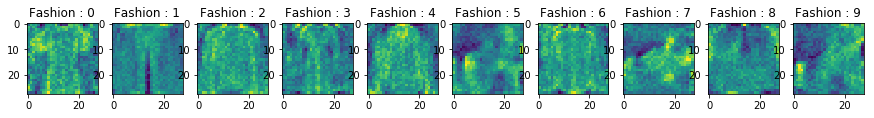

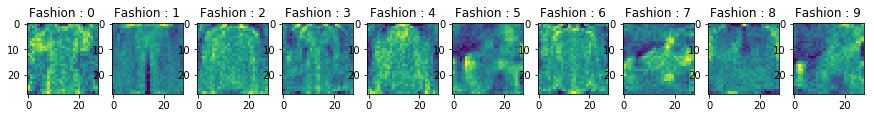

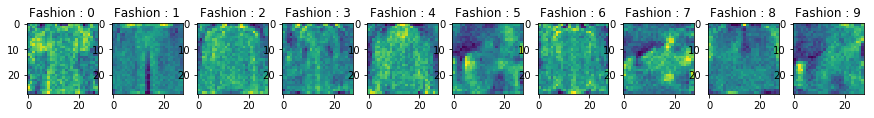

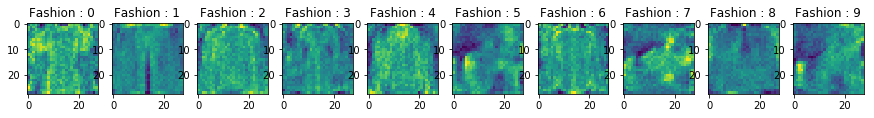

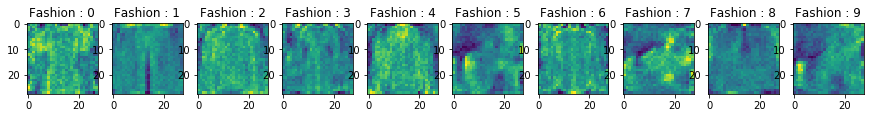

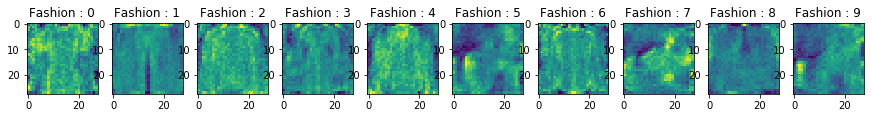

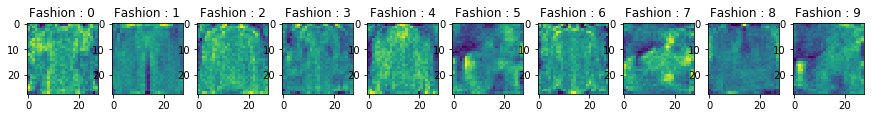

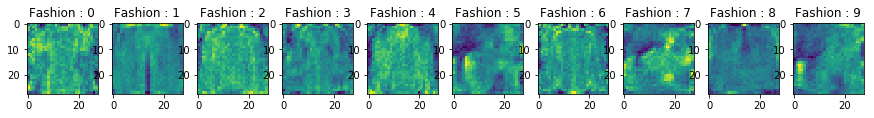

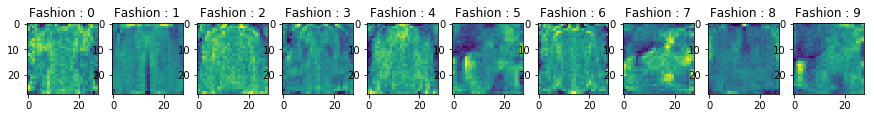

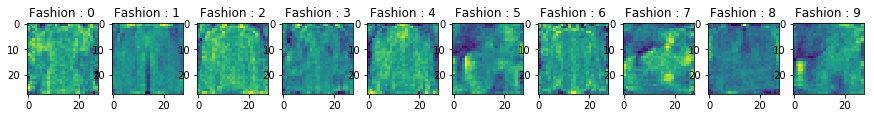

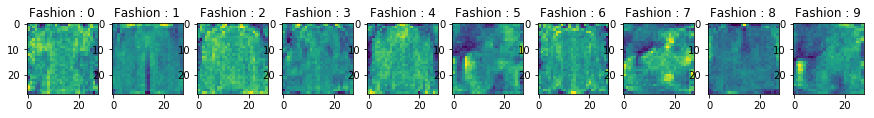

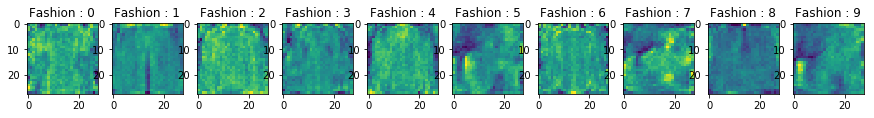

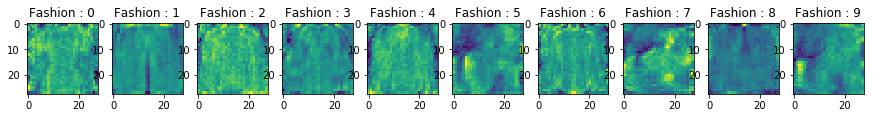

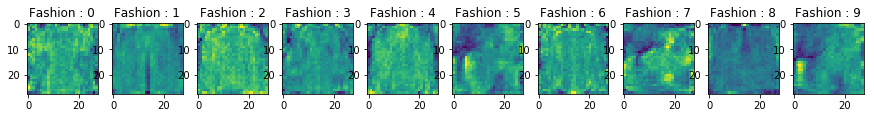

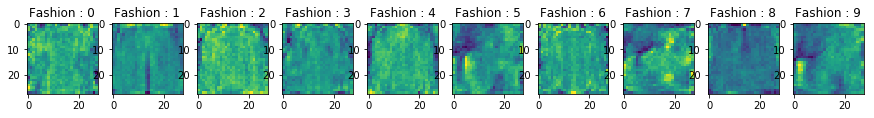

In [11]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, callbacks=[weight],epochs=20, verbose=1)

**Evaluate the Model**

In [12]:
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 0s 34us/step


[0.4433646221637726, 0.8447]

#### Assignment 1
* Change the activation function of first layer to 'relu'
* Add second layer with 32 neurons and 'relu' activation function
* Add third layer with 10 neurons and  'softmax' activation function

In [0]:
'''model = models.Sequential()
model.add(layers.Dense(10, input_shape = (784,), activation=' '))
model.add(layers.Dense( , activation=' '))
model.add(layers.Dense( , activation=''))
model.summary()'''

In [0]:
'''model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])'''

In [0]:
'''history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, callbacks=[weight],epochs=20, verbose=1)'''

**Evaluate the Model**

In [0]:
model.evaluate(xtest,ytest)